## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

This results of this test seeks to provide light/insight on the necessary course of action for a Company with regards to their e-commerce website. The company has developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product.

The main aim of this analysis/test is to help the company understand the key next step with regards to the implementation of the new web page.

<a id='probability'></a>
#### Part I - Probability

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Load/read ab_data.csv
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# check the number of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# check the number of unique users in the dataset
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# calculate the proportion of users converted,
# that is, proportion of users who decided to pay for the company's product
df.query('converted == 1').user_id.count() / df.user_id.nunique()

0.12126269856564711

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# calculate the number of times new_page and treatment don't match
no_match1 = df.query('group == "treatment" & landing_page == "old_page"').user_id.count()
no_match2 = df.query('group == "control" & landing_page == "new_page"').user_id.count()
no_match1 + no_match2

3893

f. Do any of the rows have missing values?

In [7]:
# confirm if any of the rows in the dataset have missing values
df.isna().any().any()

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# drop the rows where new_place and treatment don't match
# store the new dataframe in df2
i = df.query('group == "treatment" & landing_page == "old_page"').index
j = df.query('group == "control" & landing_page == "new_page"').index
df2 = df.drop(i)

In [9]:
# drop the rows where new_place and treatment don't match
df2.drop(j, inplace=True)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# confirm the amount of unique users in df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# confirm the amount of duplicated user_id in the dataset
duplicatedID = df2[df2.duplicated('user_id')]
duplicatedID['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
duplicatedID

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# drop the duplicate row
df2.drop(duplicatedID.index, inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# calculate the probability of an individual converting
# regardless of the page they receive
df2.query('converted == 1').user_id.count() / df2.user_id.count()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# calculate the probability of an individual converting
# if he/she was in the control group
control = df2.query('group == "control"')
control_conv = control.query('converted == 1').user_id.count() / control.user_id.count()

# display probability of converting if in control group
control_conv

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# calculate the probability of an individual converting
# if he/she was in the treatment group
treatment = df2.query('group == "treatment"')
treat_conv = treatment.query('converted == 1').user_id.count() / treatment.user_id.count()

# display probability of converting if in treatment group
treat_conv

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
# calculate the probability that an individual receives the new_page
df2.query('landing_page == "new_page"').user_id.count() / df2.user_id.count()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Considering the results above;
 - There's an 11.88% chance that an individual would convert if they receive the new page
 - Also, the chance that an individual would convert if they receive the old page is 12.04%
 - The probability of receiving the new page is 0.5001. The value is close to half which is fair.


From the above results/values, there is sufficient statistical evidence that the new treatment page leads to less conversions. But the difference in conversion rates between the new treatment page and old control page is not significant enough to coclude that the Company should not implement the new page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: P_{old}  \leq P_{new}$$


$$H_1: P_{new}  > P_{old}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
# calculate the converted rate for the new_pages
# assuming the old & new page conversion success rates are equal to the overall conversion success rate
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
# calculate the converted rate for the old_pages
# assuming the old & new page conversion success rates are equal to the overall conversion success rate
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
# Get dataframe with all records from treatment group
new_df = df2.query('group == "treatment"')

# call up the number of individuals in the treatment group
n_new = new_df.user_id.count()

# display number of individuals in the treatment group
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
# Get dataframe with all records from control group
old_df = df2.query('group == "control"')

# call up the number of individuals in the control group
n_old = old_df.user_id.count()

# display number of individuals in the control group
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
# simulate n_new samples for the treatment group 
new_bsample = new_df.sample(n_new, replace=True)

# store the conversion data for the simulated sample in new_page_converted
new_page_converted = new_bsample.converted

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
# simulate n_new samples for the control group 
old_bsample = old_df.sample(n_old, replace=True)

# store the conversion data for the simulated sample in old_page_converted
old_page_converted = old_bsample.converted

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
# compute the observed difference in conversion rate for the control and treatment group
obs_diff = new_page_converted.mean() - old_page_converted.mean()

# display the computed observed difference
obs_diff

-0.0034365094166699944

In [26]:
# calculate real difference in conversion rate for the control and treatment group
real_diff = treat_conv - control_conv

# display real_diff
real_diff

-0.0015782389853555567

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
# create a sampling distribution for the differences in conversion rates
# with bootstrapping
p_diffs = [] # store the differences in p_diffs
for _ in range(10000):
    new_bsample = new_df.sample(new_df.shape[0], replace=True)
    new_page_convert_mean = new_bsample.converted.mean()
    old_bsample = old_df.sample(old_df.shape[0], replace=True)
    old_page_convert_mean = old_bsample.converted.mean()
    # append the differences in p_diffs
    p_diffs.append(new_page_convert_mean - old_page_convert_mean)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

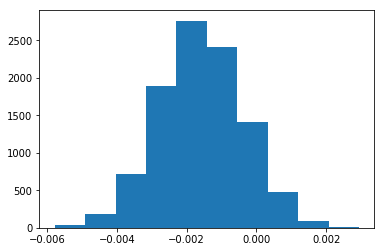

In [28]:
# convert to numpy array
p_diffs = np.array(p_diffs)

# plot sampling distribution
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
# calculate the proportion of p_diffs greater than real_diff
(p_diffs > real_diff).mean()

0.48859999999999998

In [31]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

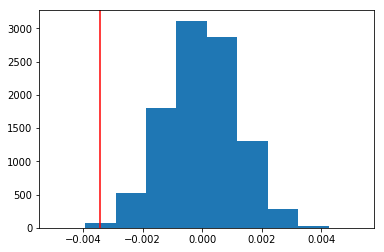

In [32]:
# plot the null distribution
plt.hist(null_vals);

# plot obs_diff
plt.axvline(x=obs_diff, color='red');

In [33]:
# compute the p-value
(null_vals > real_diff).mean()

0.89590000000000003

In [34]:
# calculate how long the test was run
df2['timestamp'] = pd.to_datetime(df['timestamp'])
df2.timestamp.max() - df2.timestamp.min()

Timedelta('21 days 23:59:49.081927')

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In part j, the standard deviation of the difference in conversion rates for the new and old page was used to determine what the sampling distribution would look like if it came from the null hypothesis. Hence, we simulate from a normal distribution.

The value computed in part j is called the p-value, which is the probability of observing our statistic (one or more extreme in favour of the alternative) if the null hypothesis is true.

With a p-value of 0.8959 and a type 1 error rate of 0.05, we fail to reject the null hypothesis as there is evidence that the conversion rate for the product increases when an individual uses the old page.

However, with the test been run for 21 days (3 weeks), the site had little traffic and conversion rates to provide a significant and consistent result. In other words, the time frame for the test needs to be extended to see if the change from the old to new page would have a significant impact.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

# compute the number of conversions for each page
convert_old = old_df.query('converted == 1').user_id.count()
convert_new = new_df.query('converted == 1').user_id.count()

# compute the number of individuals who received each page
n_old = old_df.user_id.count()
n_new = new_df.user_id.count()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [36]:
# use stats.proportions_ztest to compute the z-score and p-value respectively
sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative="smaller")

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score (1.31) means that the conversion rate for the old and new pages lies 1.31 standard deviation to the right of the sample mean while the p-value (0.9051) means that the probability of observing the statistic given the null hypothesis to be true is 0.9051.

The p-values for both results are closely related, and based on a type 1 error rate of 0.05, the both values recommends that we fail to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
# create an intercept column in df2
df2['intercept'] = 1

# create a dummy variable column for the two pages
# name this column ab_page - 1 - treatment, 0 - control
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

# display result to comfirm if both columns were created properly
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
# use sm.Logit to instantiate the regression model on the two columns created
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

# fit the model
res = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
# provide summary of fitted model
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-08 08:49 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value associated with ab_page is 0.1899. This is different from the p-value gotten in part II.

In regression, we seek to clarify if there is a linear relationship between the explanatory variable (**ab_page**) and the response variable (**converted**). 

Consequently, in the regression model, the null hypothesis states that the slope = 0 and the alternative hypothesis states that the slope is not equal to 0 whereas in part II, the null hypothesis states that the conversion rate for the control old page is less than or equal to that of the treatment new page and the alternative hypothesis states that the the conversion rate for the treatment new page is greater than that of the control new page. 

Clearly, these are two different test cases.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is a good idea to cosider other factors to add to a regression model because the more factors we add, we more we expand our scope on other variables that could possibly affect our response variable.

In the case of a multiple regression model, adding more terms can lead to multicollinearity.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
# Load/read countries.csv
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
# join df2 and df_country on the user_id column
# store in a new dataframe df_new
df_new = df2.join(df_country.set_index('user_id'), on='user_id')

In [42]:
# create dummy variables for the country columns
countries = pd.get_dummies(df_new['country'])

# join the dummy variables to df_new
# store in a new dataframe df3
df3 = df_new.join(countries)

In [52]:
# use sm.Logit to instantiate the regression model on columns created
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'CA', 'UK']])

# fit the model
res = log_mod.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-08 08:52 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

In [53]:
np.exp(res.params)

intercept    0.135779
CA           0.960018
UK           1.009966
dtype: float64

In [55]:
 1/np.exp(res.params)

intercept    7.364925
CA           1.041647
UK           0.990133
dtype: float64

From the above results;

- If an individual is from the US, they are 1.04 times more likely to convert than if they are from CA, holding all other variables constant.
- If an individual is form the UK, thery are 0.99 times more likely to convert than it they are from the US, holding all other variables constant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [46]:
# create new columns for the landing_page dummy variables
df3['CA_new'] = df3['CA'] * df3['ab_page']
df3['UK_new'] = df3['UK'] * df3['ab_page']

In [56]:
# use sm.Logit to instantiate the regression model on the required columns
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'CA_new', 'UK_new']])

# fit the model
res = log_mod.fit()

# display the summary statistics
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-08 08:52 AIC:              212779.0384
No. Observations:   290584           BIC:              212810.7773
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9963    0.0062  -322.0487  0.0000  -2.0084  -1.9841
CA_new       -0.0752    0.0376    -1.9974  0.0458  -0.1489  -0.0014
UK_new        0.0149    0.0173     0.8617  0.3888  -0.0190   0.0488
==================================================================

"""

In [57]:
np.exp(res.params)

intercept    0.135840
CA_new       0.927579
UK_new       1.015000
dtype: float64

In [58]:
1/np.exp(res.params)

intercept    7.361591
CA_new       1.078076
UK_new       0.985222
dtype: float64

From the interaction between country and page;

- If an individual is from the US, they are 1.078 times more likely to convert than if they are from CA, holding all other variables constant.
- If an individual is from the UK, they are 0.985 times more likely to convert than it they are from the US, holding all other variables constant.
- With a p-value of 0.0458 for CA_new and a type I error rate of 0.05, there is a statistical significance. Therfore, we reject the null hypothesis.
- Also, the interaction between page and country has minimal effect on the conversion rates. But it affects the p-value for individuals from CA.

### Conclusion
Based on the analysis, the results gotten are not statistically significant, therefore, we fail to reject the null hypothesis. Below are the major highlights of the test result;

- With p-values of 0.8959 & 0.1899 for the normal distribution simulation and regression model respectively and a type 1 error rate of 0.05, we fail to reject the null hypothesis as there is evidence that the conversion rate for the product increases when an individual uses the old page. Hence, the results not been statistically significant.
- Also, with a p-value of 0.458 for the interaction between country(CA) and page(ab_page) and a type I error rate of 0.05, the result is statistically significant. And therefore, we reject the null hypothesis
- It also worthy to note that the type of page received by an individual is not the only variable that could affect the conversion rate. Variables like country and interaction between country and page type are also significant in maximizing the results.

Although most of our results clearly indicates that we fail to reject the null hypothesis, meaning that the Company continues with the old page, but it should also be noted that the test only ran for 3 weeks. Practically, this time frame isn't sufficient enough to generate the amount of traffic and conversion we would require to make a more significant and consistent result. 
To make a more informed decision, I would recommend that the time frame for the test be extended to have a more convincing analysis.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

### Resources/References
 - stackoverflow.com
 - towardsdatascience.com
 - thispointer.com
 - pandas.pydata.org
 - docs.w3cub.com